# Beta Skeletons

## Bibliotecas

In [8]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

## Datos

In [9]:
data = [
    [1, "Axcotla", "Acelotla de Ocampo", "Zempoala", "Hidalgo", "Tzacuala", -98.65554600, 19.88126900, "INEGI"],
    [2, "Ahuacquatitlan (?)", "Desapareció", "???", "Hidalgo", "Zempoala", -98.66660000, 19.89990000, "DECM Gazetteer"],
    [3, "Altican", "Santa Maria Aticpac", "Nopaltepec", "Estado de México", "Tlaquilpa", -98.73699717, 19.84496873, "Ricardo kml"],
    [4, "Atlamaac (?)", "Paraje en una barranca", "Epazoyucan", "Hidalgo", "Tlaquilpa", -98.60230000, 20.00170000, "DECM Gazetteer"],
    [5, "Coatepec", "San José", "Zempoala", "Hidalgo", "Tlaquilpa", -98.77499700, 19.96406600, "INEGI"],
    [6, "Epasyouac", "Epazoyucan", "Epazoyucan", "Hidalgo", "Cabecera", -98.63620900, 20.01802200, "INEGI"],
    [7, "Huitepec", "San Pedro Huitepec", "Zapotlán de Juárez", "Hidalgo", "Tzacuala", -98.89472400, 20.08578200, "INEGI"],
    [8, "Huitznahuac", "Huitznahuac", "Zempoala", "Hidalgo", "Zempoala", -98.70833700, 19.96097900, "Dra. María"],
    [9, "Ixcoscalla", "San José Palma Gorda", "Mineral de la Reforma", "Hidalgo", None, -98.75243900, 20.02386800, "INEGI"],
    [10, "Nequemetepec", "Ex-Hacienda Metepec", "Zempoala", "Hidalgo", "Tecipilpan", -98.66537900, 19.95832800, "INEGI"],
    [11, "Nopalapan", "San Miguel Nopalapa", "Zempoala", "Hidalgo", "Tecipilpan", -98.71254900, 20.01471800, "INEGI"],
    [12, "Oztotlatlauhca", "Cerro Colorado", "Singuilucan", "Hidalgo", "Epazoyuca", -98.58112600, 19.97920000, "INEGI"],
    [13, "Oztoyuca", "San Antonio Oxtoyuca", "Zempoala", "Hidalgo", "Epazoyuca", -98.67021300, 19.92778400, "INEGI"],
    [14, "Pachuca", "Ciudad de Pachuca de Soto", "Pachuca de Soto", "Hidalgo", None, -98.73700100, 20.12236000, "INEGI"],
    [15, "Quiyahuca (?)", "Desapareció", "???", "Hidalgo", "Zempoala", -98.68752300, 19.89024500, "DECM Gazetteer"],
    [16, "Tecocomolco", "Tecocomolco de Juárez", "Cuautepec de Hinojosa", "Hidalgo", "Tzacuala", -98.35224700, 19.90521800, "INEGI"],
    [17, "Tecpa", "Hacienda Tepa el Chico", "Zempoala", "Hidalgo", "Zempoala", -98.60399900, 19.90472600, "INEGI"],
    [18, "Tepa", "Tepa el Grande", "Zempoala", "Hidalgo", "Epazoyuca", -98.60649700, 19.85914600, "INEGI"],
    [19, "Tepechichilco", "Tepechichilco", "Tlanalapa", "Hidalgo", "Tetliztaca", -98.56329800, 19.87213400, "INEGI"],
    [20, "Tepemaxalco", "San Juan Tepemaxalco", "Zempoala", "Hidalgo", "Tetliztaca", -98.67399500, 19.90162500, "INEGI"],
    [21, "Tepeyhaulco", "Tepeyhaulco", "Zempoala", "Hidalgo", None, -98.67080600, 19.84068200, "INEGI"],
    [22, "Tetliztaca", "Santo Tomás", "Zempoala", "Hidalgo", "Cabecera", -98.68015000, 19.98730000, "INEGI"],
    [23, "Tetzahuapan", "San Juan Tizahuapan", "Epazoyucan", "Hidalgo", "Tecipilpan", -98.61529800, 19.96728000, "INEGI"],
    [24, "Tezoacoahuac", "San Nicolás Teocoac", "Singuilucan", "Hidalgo", "Epazoyuca", -98.59999800, 19.97140500, "INEGI"],
    [25, "Tianguizmanalco (?)", "Desapareció", "???", "Hidalgo", "Tetliztaca", -98.55650000, 19.80500000, "DECM Gazetteer"],
    [26, "Tilanempax", "Nextlalpan (San Miguel Nextlalpan)", "Zempoala", "Hidalgo", "Tecipilpan", -98.71254900, 19.95283200, "INEGI"],
    [27, "Tlaquilpa", "San Pedro Tlaquilpan", "Zempoala", "Hidalgo", "Cabecera", -98.75228300, 19.94376700, "INEGI"],
    [28, "Tochtlauhco", "Ex-Hacienda San Antonio Tochtlacc", "Zempoala", "Hidalgo", "Epazoyuca", -98.71549600, 19.87720700, "INEGI"],
    [29, "Tzapotla", "San Agustín Zapotla", "Zempoala", "Hidalgo", "Epazoyuca", -98.71400000, 19.86721800, "INEGI"],
    [30, "Tzapotlan", "Zapotlán de Juárez", "Zapotlán de Juárez", "Hidalgo", "Tecipilpan", -98.86183800, 19.97430700, "INEGI"],
    [31, "Tzihuacyuca", "San Gabriel Azteca", "Zempoala", "Hidalgo", "Tetliztaca", -98.66370000, 19.93600000, "INEGI"],
    [32, "Tzontemocatempetel", "Zontecomate", "Zempoala", "Hidalgo", None, -98.59150900, 19.96673000, "INEGI"],
    [33, "Xalpa", "Jalalipa", "Zempoala", "Hidalgo", None, -98.61992772, 19.92800000, "INEGI"],
    [34, "Xalla", "Ex hacienda San Antonio Xalla", "Zempoala", "Hidalgo", "Epazoyuca", -98.61194676, 19.85422700, "Google maps"],
    [35, "Xochitecuhtla", "Xochitcuehca", "Epazoyucan", "Hidalgo", "San Agustin Tz.", -98.70818410, 19.87911230, "INEGI"],
    [36, "Zempoala primitiva", "Cerro de los Pitos", "Zempoala", "Hidalgo", "Cabecera", -98.73530000, 19.92340000, "Mapcarta.com"],
    [37, "Tzacuala primitiva", "Las Palmas (Ejido Zacuala)", "Zempoala", "Hidalgo", "Cabecera", -98.58901700, 19.92821200, "INEGI Histórico"]
]

columns = ["ID", "Pueblo", "Nombre moderno", "Municipio", "Estado", "Sujeto de", "Longitud", "Latitud", "Fuente de coords."]

df = pd.DataFrame(data, columns=columns)


In [10]:
df

,ID,Pueblo,Nombre moderno,Municipio,Estado,Sujeto de,Longitud,Latitud,Fuente de coords.
0,1,Axcotla,Acelotla de Ocampo,Zempoala,Hidalgo,Tzacuala,-98.655546,19.881269,INEGI
1,2,Ahuacquatitlan (?),Desapareció,???,Hidalgo,Zempoala,-98.666600,19.899900,DECM Gazetteer
2,3,Altican,Santa Maria Aticpac,Nopaltepec,Estado de México,Tlaquilpa,-98.736997,19.844969,Ricardo kml
3,4,Atlamaac (?),Paraje en una barranca,Epazoyucan,Hidalgo,Tlaquilpa,-98.602300,20.001700,DECM Gazetteer
4,5,Coatepec,San José,Zempoala,Hidalgo,Tlaquilpa,-98.774997,19.964066,INEGI
5,6,Epasyouac,Epazoyucan,Epazoyucan,Hidalgo,Cabecera,-98.636209,20.018022,INEGI
6,7,Huitepec,San Pedro Huitepec,Zapotlán de Juárez,Hidalgo,Tzacuala,-98.894724,20.085782,INEGI
7,8,Huitznahuac,Huitznahuac,Zempoala,Hidalgo,Zempoala,-98.708337,19.960979,Dra. María
8,9,Ixcoscalla,San José Palma Gorda,Mineral de la Reforma,Hidalgo,None,-98.752439,20.023868,INEGI
9,10,Nequemetepec,Ex-Hacienda Metepec,Zempoala,Hidalgo,Tecipilpan,-98.665379,19.958328,INEGI


## STEP 1: Coordinates from DataFrame

In [11]:
coords = df[["Longitud", "Latitud"]].values
names = df["Pueblo"].values

## STEP 2: Function to build beta-skeleton

In [15]:
def beta_skeleton_graph(coords, beta=1):
    n = len(coords)
    G = nx.Graph()

    for i in range(n):
        G.add_node(i, pos=coords[i], name=names[i])

    D = distance_matrix(coords, coords)

    for i in range(n):
        for j in range(i+1, n):
            dij = D[i, j]
            is_edge = True

            for k in range(n):
                if k == i or k == j:
                    continue

                dik = D[i, k]
                djk = D[j, k]

                # β-skeleton rule (circle-based): if another point lies within the lune
                if beta * dij > max(dik, djk):
                    is_edge = False
                    break

            if is_edge:
                G.add_edge(i, j, weight=dij)

    return G

## STEP 3: Build and visualize the graph

### Beta =1 (Gabriel Graph)

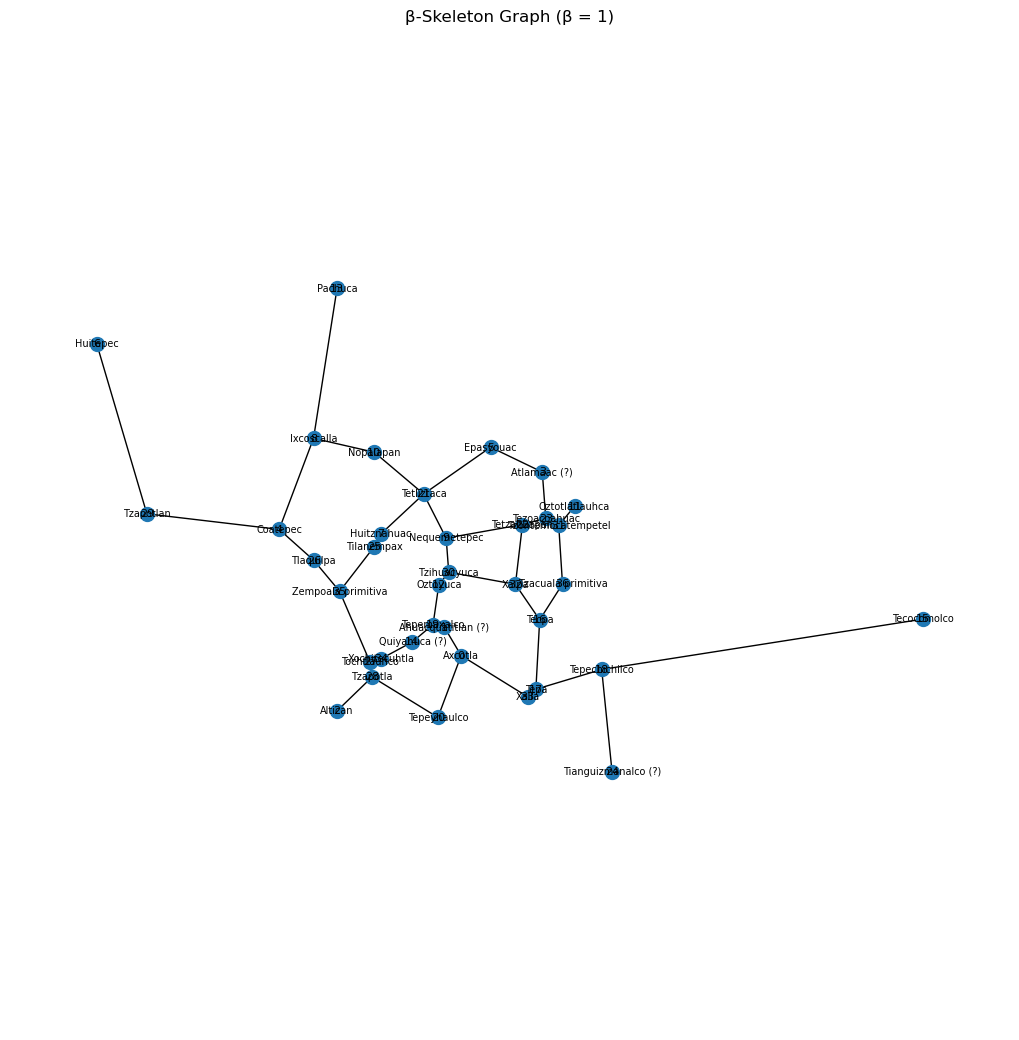

In [16]:
beta = 1  # You can try with 1, 1.5, 2
G = beta_skeleton_graph(coords, beta=beta)

# Draw graph
plt.figure(figsize=(10, 10))
pos = {i: (x, y) for i, (x, y) in enumerate(coords)}
nx.draw(G, pos, with_labels=True, node_size=100, font_size=8)
labels = {i: name for i, name in enumerate(names)}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=7)
plt.title(f"β-Skeleton Graph (β = {beta})")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.axis("equal")
plt.show()

### Beta = 2 (Relative Neighborhood Graph)

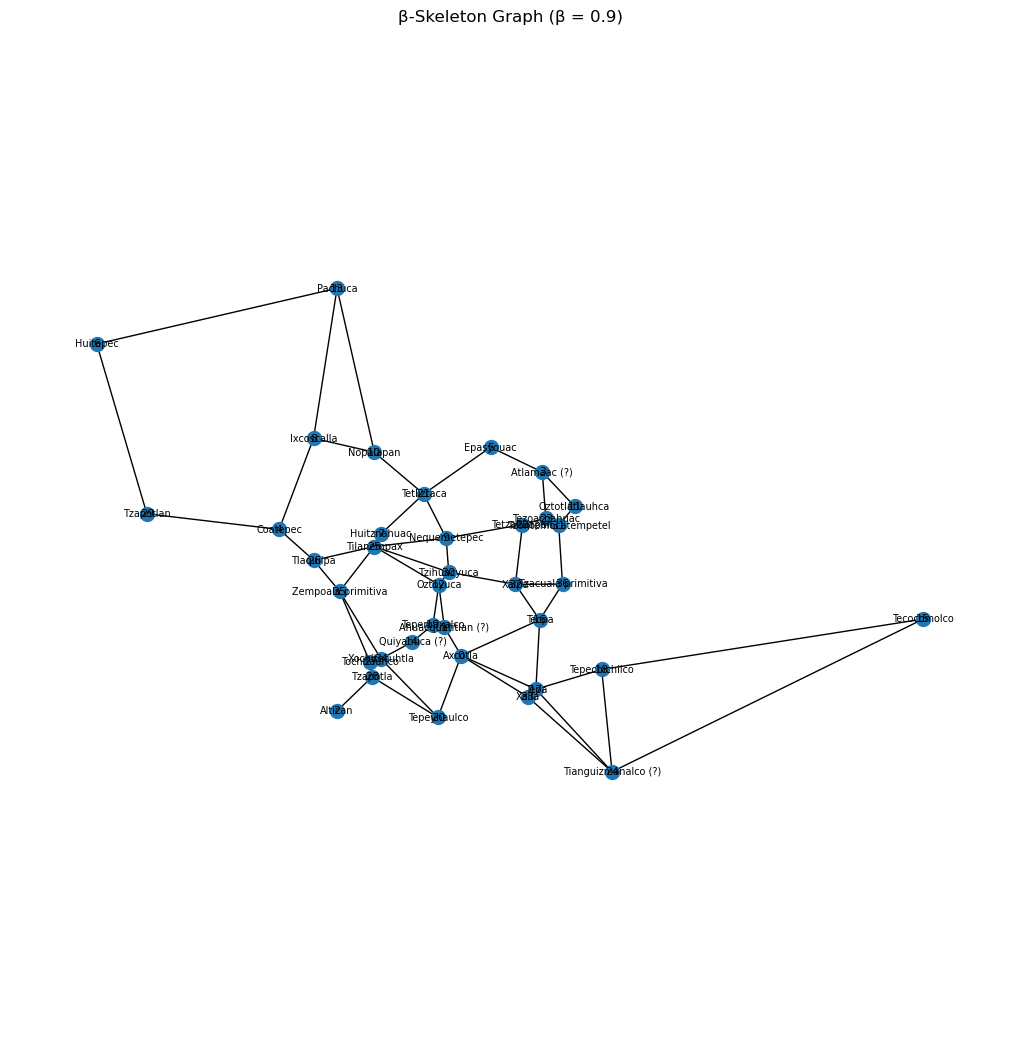

In [20]:
beta = 0.9  # You can try with 1, 1.5, 2
G = beta_skeleton_graph(coords, beta=beta)

# Draw graph
plt.figure(figsize=(10, 10))
pos = {i: (x, y) for i, (x, y) in enumerate(coords)}
nx.draw(G, pos, with_labels=True, node_size=100, font_size=8)
labels = {i: name for i, name in enumerate(names)}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=7)
plt.title(f"β-Skeleton Graph (β = {beta})")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.axis("equal")
plt.show()